In [1]:
#import libraries
import pandas as pd                         
import numpy as np
import matplotlib.pyplot as plt   #for visualisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load mnist Dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.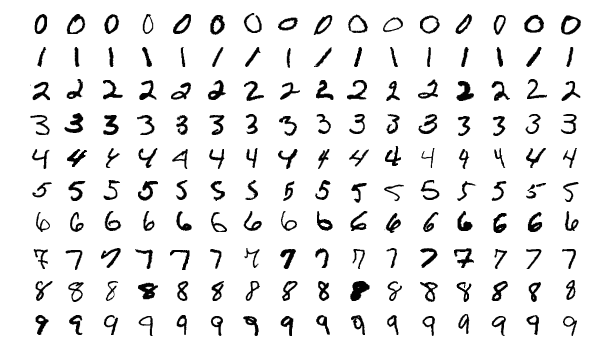

In [2]:
dataset=pd.read_csv("/home/kaijuri/Desktop/vision photos/digit-recognizer/train.csv")
dataset.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(dataset.shape)
x=dataset.drop('label',axis=1).values               #drop label attribute for testing and training 
y=dataset['label'].values
print(x.shape)
print(y.shape)                                      #number(0-9) on image 

(42000, 785)
(42000, 784)
(42000,)


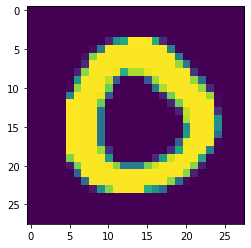

In [4]:
#view the single digit
d=x[4]
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [5]:
# split the dataset for training and testing randomly
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [6]:
#train dataset size must be lager than test dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


In [7]:
#model training
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
#prediction
predictions=knn.predict(x_test)

In [19]:
#check the accuracy of the model
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions)) #accuracy is good

[[1266    0    1    0    0    1    8    0    0    0]
 [   0 1412    1    1    0    0    0    2    0    0]
 [   9   16 1152    5    1    0    3   20    3    0]
 [   2    4   10 1212    0   14    1    7    9    9]
 [   1   12    0    0 1228    0    6    4    0   26]
 [   4    3    1   18    4 1050   14    1    1    5]
 [   4    4    0    0    1    3 1201    0    1    0]
 [   1   11    7    1    4    0    0 1298    0   16]
 [   9   13   13   20    7   25    8   10 1135   13]
 [   6    2    2   10   12    6    1   21    0 1188]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1276
           1       0.96      1.00      0.98      1416
           2       0.97      0.95      0.96      1209
           3       0.96      0.96      0.96      1268
           4       0.98      0.96      0.97      1277
           5       0.96      0.95      0.95      1101
           6       0.97      0.99      0.98      1214
           7       0.95      0.97 

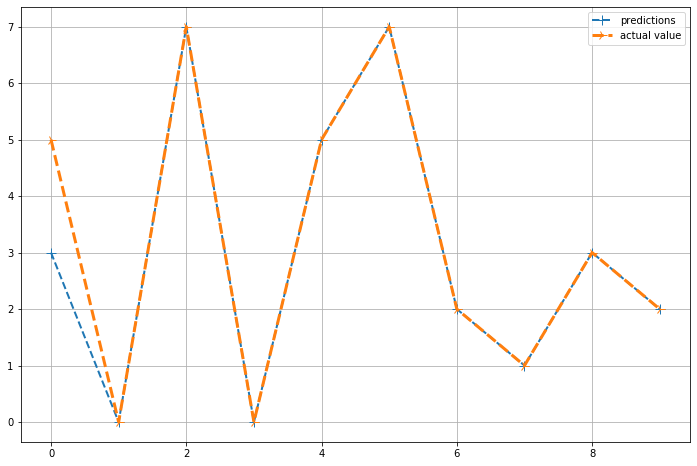

In [39]:
#view the accuracy
plt.figure(figsize=(12,8))
line1=plt.plot(predictions[:10],label='predictions')
line2=plt.plot(y_test[:10],label='actual value')
plt.setp(line1,linewidth=2,marker='+',markersize=10,linestyle='--')
plt.setp(line2,linewidth=3,marker='4',markersize=10,linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# optimization

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.models import load_model
import numpy as np
from keras.utils.vis_utils import plot_model

In [56]:
model=Sequential()

#add NN layers
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) #padding same means size of output dim does't change 
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-07) #optimisers 

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)         

In [10]:
new_xtrain=x_train.reshape(x_train.shape[0],28,28,1)
new_xtest=x_test.reshape(x_test.shape[0],28,28,1)
#convert to categorical
#one hot encoding
new_ytrain=keras.utils.to_categorical(y_train)
new_ytest=keras.utils.to_categorical(y_test)

In [66]:
#train model
history=model.fit(new_xtrain,new_ytrain,shuffle=True,batch_size=32,epochs=10,validation_data=(new_xtest,new_ytest))

score=model.evaluate(new_xtest,new_ytest)


print("print test loss",score[0])
print("test accuracy",score[1])

Epoch 1/10
919/919 [==============================] - 85s 92ms/step - loss: 0.0906 - accuracy: 0.9725 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 2/10
919/919 [==============================] - 84s 92ms/step - loss: 0.0808 - accuracy: 0.9759 - val_loss: 0.0469 - val_accuracy: 0.9864
Epoch 3/10
919/919 [==============================] - 85s 92ms/step - loss: 0.0729 - accuracy: 0.9773 - val_loss: 0.0457 - val_accuracy: 0.9856
Epoch 4/10
919/919 [==============================] - 85s 92ms/step - loss: 0.0670 - accuracy: 0.9800 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 5/10
919/919 [==============================] - 81s 88ms/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0468 - val_accuracy: 0.9871
Epoch 6/10
919/919 [==============================] - 76s 83ms/step - loss: 0.0572 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9849
Epoch 7/10
919/919 [==============================] - 80s 87ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.0385 - val_accuracy:

In [67]:
#save the model
model.save("/home/kaijuri/Desktop/deep_digits.h5")

# plot the model accuracy and loss

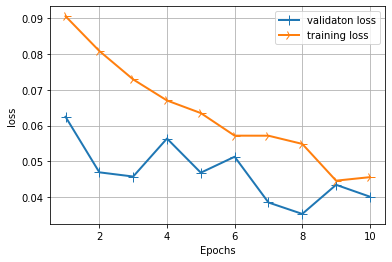

In [69]:
#loss
history_dic=history.history
loss_values=history_dic['loss']
val_loss_values=history_dic['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='validaton loss')
line2=plt.plot(epochs,loss_values,label='training loss')
plt.setp(line1,linewidth=2,marker='+',markersize=10)
plt.setp(line2,linewidth=2,marker='4',markersize=10)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()

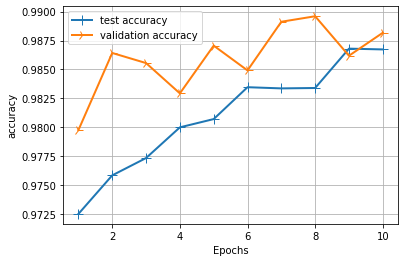

In [70]:
#accuracy
history_dic=history.history
train_acc=history_dic['accuracy']
val_accuracy=history_dic['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,train_acc,label='test accuracy')
line2=plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.setp(line1,linewidth=2,marker='+',markersize=10)
plt.setp(line2,linewidth=2,marker='4',markersize=10)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [13]:
new_xtrain[0].shape

(28, 28, 1)

ValueError: cannot reshape array of size 23049600 into shape (28,28,1)